<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Perceptron</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
iris = load_iris()

In [3]:
X=iris.data[:,[0, 2]]
len(X)

150

In [4]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

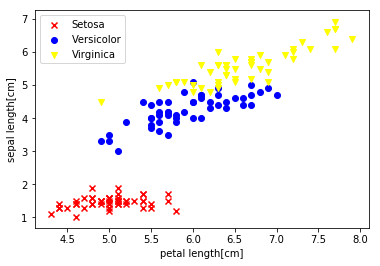

In [5]:
plt.scatter(X[:50, 0],X[:50, 1], color='red', marker='x',label='Setosa')
plt.scatter(X[50:100, 0],X[50:100, 1], color='blue', marker='o',label='Versicolor')
plt.scatter(X[100:150, 0],X[100:150, 1], color='yellow', marker='v',label='Virginica')
plt.xlabel('petal length[cm]')
plt.ylabel('sepal length[cm]')
plt.legend(loc='best')
plt.show()

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
sc = StandardScaler()

In [8]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [12]:
p = Perceptron(penalty='elasticnet',alpha=0.001,eta0=0.01, max_iter=1000) #n_iter is depricated used max_iter

In [13]:
p.fit(X_train_std, y_train)

Perceptron(alpha=0.001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty='elasticnet',
      random_state=0, shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(p, X_test_std, y_test, cv=5)

array([0.6 , 0.9 , 1.  , 0.75, 0.75])

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
p_pred = p.predict(X_test_std)
print(confusion_matrix(y_test,p_pred))

[[15  0  0]
 [ 1 11  0]
 [ 0 14  4]]


In [16]:
print(classification_report(y_test,p_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        15
          1       0.44      0.92      0.59        12
          2       1.00      0.22      0.36        18

avg / total       0.83      0.67      0.63        45



## Plotting Decision Boundaries:

In [17]:
import Plotting_Decision_Boundaries as pdb

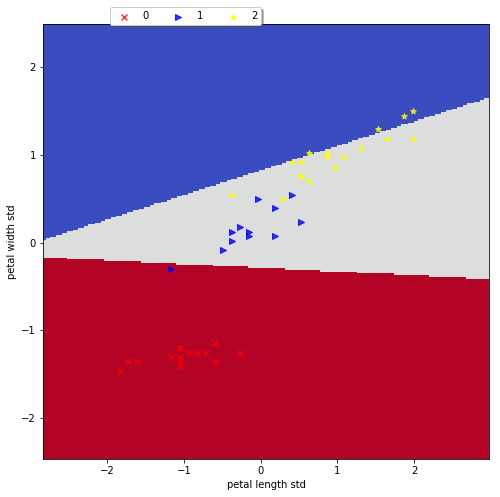

In [18]:
pdb.plot_regions(X=X_test_std,y=y_test,classifier=p)

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html